# Convolution Neural Networks


![alt text](LeNet_figure.png "Title")

We will work with the MNIST digits database (Modified National Institute of Standards and Technology database). It contains 70 000 images of hand-written digits.

![alt text](mnist_example.png "Title")

The MNIST is common starting point for testing different algorithms for image recognition and processing.

ANNs can usually achive averge error rates ranging from 0.21 to 1.6 %.

## 1. Getting data

Due to wide usage of the MNIST database, Keras has own API for downloading it.

You can download the load data file *'MNIST.pckl'* if your network doesn't allow Keras API.

In [8]:
from tensorflow.keras.datasets import mnist
import pandas as pd

# Primary option
data = mnist.load_data()
print(data)
# If network is not working, use pickle
'''
import pickle
with open('MNIST.pckl', 'rb') as file:
   data = pickle.load(file)
'''

training_set = data[0]
validation_set = data[1]
input_values = training_set[0]
output_values = training_set[1]
input_values_valid = validation_set[0]
output_values_valid = validation_set[1]

# Print shapes
print('Input for fitting shape:', input_values.shape)
print('Output for fitting shape:', output_values.shape)
print('Input for validation shape:', input_values_valid.shape)
print('Output for validation shape:', output_values_valid.shape)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

As you can see, we have 60 000 images in the fitting set, each 28x28 pixels.

For demonstration, lets plot some of them:

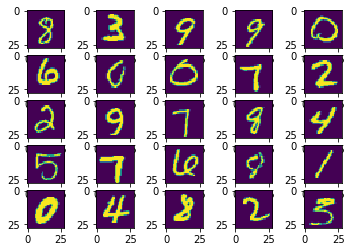

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(5, 5)
# create a horizontal plot
for row in range(0, 5):
    for col in range(0, 5):
        index = np.random.randint(0, 60000)
        axs[row, col].imshow(input_values[index])

Creating LeNet

Now that we know what to expect, lets build and train our own model.

Stacking layers into ConvNet is similar to what we have seen before: define *Sequential* and stack all layers that you need.

This tutorial introduces four new layers: Conv2D, MaxPooling2D, and Flatten. These and correspoding parameters should be familiar from the lecture slides.

**Conv2D** is the layer with convolution neurons. Each filter has convolution neurons with sparce connections and shared weights. This will effectively provide a filtered version of input. For example, layer with 5 filters provide 5 images for each input.

**MaxPooling2D** provides the familiar downsampling according to maximum value of nearby elements. For example, pool size of *(2, 2)* reduces input size to 1/4 and pool size of *(4,4)* to 1/16.

**Flatten** simply reshapes input into a single vector.

In context of CNNs, it is common to use rectified linear units or their leaky version instead of sigmoid or hyperbolic tangent. The original LeNet implementation used the *tanh* activation. Later, *relu* was found to work better.

In [48]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Get input shape without batch size
input_shape = input_values.shape[1:] 
print(input_shape)

model = Sequential()
model.add(Conv2D(filters=10,
                 kernel_size=10,
                 strides=2,
                 input_shape=input_shape,
                 padding='same',
                 activation='relu',
                 name='conv1'))

model.add(MaxPooling2D(pool_size=(2, 2),
                       padding='valid',
                       name='pool1'))

model.add(Conv2D(filters=18,
                 kernel_size=10,
                 strides=2,
                 input_shape=input_shape,
                 padding='same',
                 activation='relu',
                 name='conv2'))

model.add(MaxPooling2D(pool_size=(2, 2),
                       padding='valid',
                       name='pool2'))

model.add(Flatten(name='hidden4'))

model.add(Dense(10, activation='softmax',
                kernel_initializer='random_uniform',
                bias_initializer='random_uniform'))

(28, 28, 1)


For compiling the model we use categorical crossentropy as loss function. Categorical crossentropy together with softmax output is usually good choice to predict multiple mutually-exclusive classes (digits are not one and another at same time).

In [49]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 14, 14, 10)        1010      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 7, 7, 10)          0         
_________________________________________________________________
conv2 (Conv2D)               (None, 4, 4, 18)          18018     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 2, 2, 18)          0         
_________________________________________________________________
hidden4 (Flatten)            (None, 72)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                730       
Total params: 19,758
Trainable params: 19,758
Non-trainable params: 0
_________________________________________________________________
None


Now everything is set for fitting your model.

We will use a new trick here: we calculate validation error during fitting. The parameter *validation_split* in the fit method takes portion of data into validation set and does not use it for fitting. It will calculate validation error against this set in the end of each epoch. So, we have new validation set and the validation data that we already have is left as testing set (remember the division into fitting set, validation set, and testing set).

Fitting the model might take few minutes. If it is too slow, you can reduce number of epochs, increase batch size, or change you CNN architecture.

In [50]:
model.fit(input_values,
          output_values,
          batch_size=20,
          epochs=40,
          shuffle=True,
          verbose=1,
          validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 17s 323us/step - loss: 0.1898 - acc: 0.9435 - val_loss: 0.0779 - val_acc: 0.9770
Epoch 2/40
54000/54000 [==============================] - 16s 292us/step - loss: 0.0996 - acc: 0.9708 - val_loss: 0.0916 - val_acc: 0.9760
Epoch 3/40
54000/54000 [==============================] - 16s 299us/step - loss: 0.0887 - acc: 0.9748 - val_loss: 0.0729 - val_acc: 0.9798
Epoch 4/40
54000/54000 [==============================] - 16s 305us/step - loss: 0.0824 - acc: 0.9773 - val_loss: 0.1158 - val_acc: 0.9718
Epoch 5/40
54000/54000 [==============================] - 16s 298us/step - loss: 0.0770 - acc: 0.9793 - val_loss: 0.1087 - val_acc: 0.9770
Epoch 6/40
54000/54000 [==============================] - 17s 315us/step - loss: 0.0751 - acc: 0.9806 - val_loss: 0.0884 - val_acc: 0.9795
Epoch 7/40
54000/54000 [==============================] - 17s 307us/step - loss: 0.0700 - acc: 0.9822 - val_loss: 0.1

Model is ready. We can plot plot learning curve of the neural network using model history. Also, lets do model evaluation similarly as with the pre-trained model.

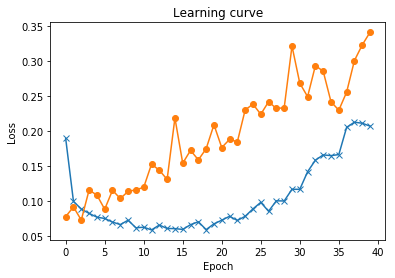

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.95      0.97       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.95      0.99      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 972    0    1    0    0    0    5    0    1    1]
 [   0 1122    1    1    0    3    2    1    5    0]
 [   2   10  985    2    0    1    0   24    8    0]
 [   0    0    0  980    0   15    0    5    6    4]
 [   1    0    2    0  932   

In [51]:
# Plot the learning curve
plt.title('Learning curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(model.history.history['loss'], 'x-')
plt.plot(model.history.history['val_loss'], 'o-')
plt.show()

# Do predictions for validation set.
predictions = model.predict(input_values_valid)

# Change predictions and true labels away from one-hot encoding
predictions2 = [np.argmax(x) for x in predictions]
true_values = [np.argmax(x) for x in output_values_valid]

# Make report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

report = classification_report(true_values, predictions2)
confusion = confusion_matrix(true_values, predictions2)

print(report)
print(confusion)

True label:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
CNN output: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


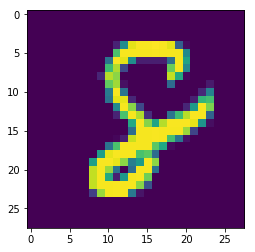

True label:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
CNN output: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


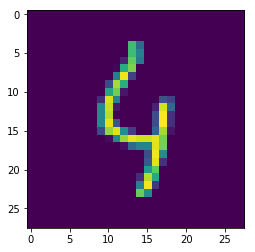

True label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
CNN output: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


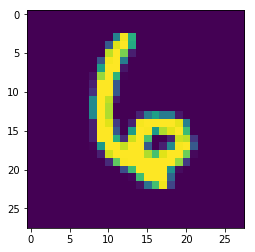

True label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
CNN output: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


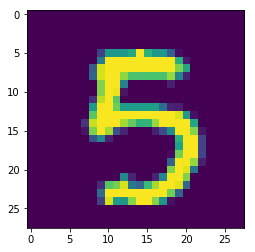

True label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
CNN output: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


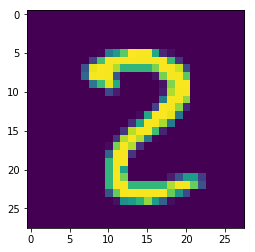

True label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
CNN output: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


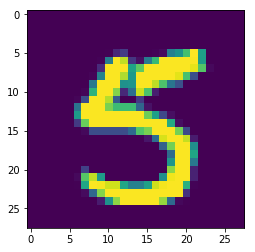

True label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
CNN output: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


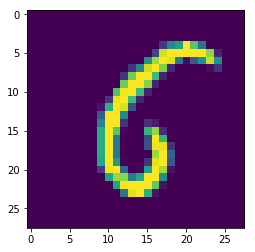

True label:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
CNN output: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


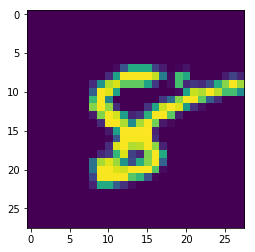

True label:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
CNN output: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


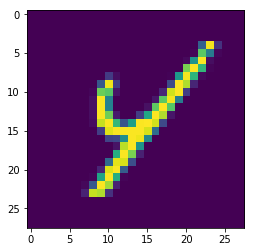

True label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
CNN output: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


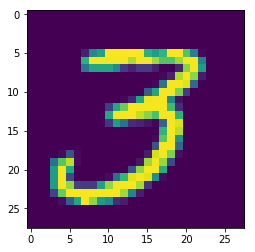

In [56]:
# Print few predictions and corresponding true labels
for sample in range(0, 10):
    index = np.random.randint(0, 10000)
    print('True label: ', output_values_valid[index])
    print('CNN output:', np.round(predictions[index], 3))
    plt.imshow(input_values_valid[index][:,:,-1])
    plt.show()

Notice, that your initial results are probably worse than with pre-trained model. This model had less filters in convolution layers.

You can experiment with different number of neurons, teaching times, activation functions, and even with the CNN architecture to get better results.

If you think that you should resume trainin, just call fit method again.

When you are ready, save the model:

In [57]:
model.save('./My_LeNet')